# Deep Learning with Torch: the 60-minute blitz


###Goal of this talk
* Understand torch and the neural networks package at a high-level.
* Train a small neural network on CPU and GPU

##What is Torch?

Torch is a scientific computing framework based on Lua[JIT] with strong CPU and CUDA backends.

Strong points of Torch:

* Efficient Tensor library (like NumPy) with an efficient CUDA backend
* Neural Networks package -- build arbitrary acyclic computation graphs with automatic differentiation
   * also with fast CUDA and CPU backends
* Good community and industry support - several hundred community-built and maintained packages.
* Easy to use Multi-GPU support and parallelizing neural networks

http://torch.ch  
https://github.com/torch/torch7/wiki/Cheatsheet

##Before getting started

* Based on Lua and runs on Lua-JIT (Just-in-time compiler) which is fast
* Lua is pretty close to javascript.
   * variables are global by default, unless `local` keyword is used
* Only has one data structure built-in, a table: `{}`. Doubles as a hash-table and an array.
* 1-based indexing.
* `foo:bar()` is the same as `foo.bar(foo)`

##Getting Started
#### Strings, numbers, tables - a tiny introduction

In [1]:
a = 'hello'

In [2]:
print(a)

hello	


In [3]:
b = {}

In [4]:
b[1] = a

In [5]:
print(b)

{
  1 : hello
}


In [6]:
b[2] = 30

In [7]:
for i=1,#b do -- the # operator is the length operator in Lua
    print(b[i]) 
end

hello	
30	


####Tensors

In [10]:
a = torch.Tensor(5,3) -- construct a 5x3 matrix, uninitialized

In [11]:
a = torch.rand(5,3)
print(a)

 0.5493  0.8381  0.1990
 0.0210  0.2463  0.8676
 0.9922  0.7973  0.7677
 0.0407  0.8875  0.2183
 0.1689  0.1785  0.2966
[torch.DoubleTensor of size 5x3]



In [14]:
b=torch.rand(3,4)

In [15]:
-- matrix-matrix multiplication: syntax 1
a*b 

 0.5244  1.1796  0.8949  0.3673
 0.5211  0.4671  0.4062  0.4001
 0.7619  1.5793  1.3665  0.5859
 0.5581  0.8990  0.5583  0.3655
 0.2271  0.3515  0.3051  0.1747
[torch.DoubleTensor of size 5x4]



In [16]:
-- matrix-matrix multiplication: syntax 2
torch.mm(a,b) 

 0.5244  1.1796  0.8949  0.3673
 0.5211  0.4671  0.4062  0.4001
 0.7619  1.5793  1.3665  0.5859
 0.5581  0.8990  0.5583  0.3655
 0.2271  0.3515  0.3051  0.1747
[torch.DoubleTensor of size 5x4]



In [17]:
-- matrix-matrix multiplication: syntax 3
c=torch.Tensor(5,4)
c:mm(a,b) -- store the result of a*b in c

####CUDA Tensors
Tensors can be moved onto GPU using the :cuda function

In [18]:
require 'cutorch';
a = a:cuda()
b = b:cuda()
c = c:cuda()
c:mm(a,b) -- done on GPU

[string "require 'cutorch';..."]:1: module 'cutorch' not found:
	no field package.preload['cutorch']
	no file '/Users/ctsai89/.luarocks/share/lua/5.1/cutorch.lua'
	no file '/Users/ctsai89/.luarocks/share/lua/5.1/cutorch/init.lua'
	no file '/Users/ctsai89/torch/install/share/lua/5.1/cutorch.lua'
	no file '/Users/ctsai89/torch/install/share/lua/5.1/cutorch/init.lua'
	no file './cutorch.lua'
	no file '/Users/ctsai89/torch/install/share/luajit-2.1.0-beta1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch/init.lua'
	no file '/Users/ctsai89/torch/install/lib/cutorch.dylib'
	no file '/Users/ctsai89/.luarocks/lib/lua/5.1/cutorch.so'
	no file '/Users/ctsai89/torch/install/lib/lua/5.1/cutorch.so'
	no file './cutorch.so'
	no file '/usr/local/lib/lua/5.1/cutorch.so'
	no file '/usr/local/lib/lua/5.1/loadall.so'
stack traceback:
	[C]: in function 'require'
	[string "require 'cutorch';..."]:1: in main chunk
	[C]: in function 'xpcall'
	/Users/ctsai89/torch/install/share/lua/5.1/itorch/main.lua:179: in function </Users/ctsai89/torch/install/share/lua/5.1/itorch/main.lua:143>
	/Users/ctsai89/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...s/ctsai89/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...s/ctsai89/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...s/ctsai89/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/Users/ctsai89/torch/install/share/lua/5.1/itorch/main.lua:350: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x0104290bd0: 

####Exercise: Add two tensors
https://github.com/torch/torch7/blob/master/doc/maths.md#res-torchaddres-tensor1-tensor2

In [19]:
function addTensors(a,b)
    return a:add(b)
end

In [20]:
a = torch.ones(5,2)
b = torch.Tensor(2,5):fill(4)
print(addTensors(a,b))

 5  5
 5  5
 5  5
 5  5
 5  5
[torch.DoubleTensor of size 5x2]



### Neural Networks
Neural networks in Torch can be constructed using the `nn` package.

In [21]:
require 'nn';

`Modules` are the bricks used to build neural networks. Each are themselves neural networks, but can be combined with other networks using `containers` to create complex neural networks

For example, look at this network that classfies digit images:
![LeNet](http://fastml.com/images/cifar/lenet5.png)

It is a simple feed-forward network.   
It takes the input, feeds it through several layers one after the other, and then finally gives the output.

Such a network container is `nn.Sequential` which feeds the input through several layers.

In [22]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(1, 6, 5, 5)) -- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

print('Lenet5\n' .. net:__tostring());

Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2,2,2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2,2,2,2)
  (7): nn.View
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


Other examples of nn containers are shown in the figure below:
![containers](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/nn_containers.png)

Every neural network module in torch has automatic differentiation.
It has a `:forward(input)` function that computes the output for a given input, flowing the input through the network.
and it has a `:backward(input, gradient)` function that will differentiate each neuron in the network w.r.t. the gradient that is passed in. This is done via the chain rule.

In [23]:
input = torch.rand(1,32,32) -- pass a random tensor as input to the network

In [24]:
output = net:forward(input)

In [25]:
print(output)

-2.2596
-2.2956
-2.3207
-2.4035
-2.3911
-2.2980
-2.1938
-2.2682
-2.2352
-2.3821
[torch.DoubleTensor of size 10]



In [26]:
net:zeroGradParameters() -- zero the internal gradient buffers of the network (will come to this later)

In [27]:
gradInput = net:backward(input, torch.rand(10))

In [28]:
print(#gradInput)

  1
 32
 32
[torch.LongStorage of size 3]



### Criterion: Defining a loss function
When you want a model to learn to do something, you give it feedback on how well it is doing. This function that computes an objective measure of the model's performance is called a __loss function__.

A typical loss function takes in the model's output and the groundtruth and computes a value that quantifies the model's performance.

The model then corrects itself to have a smaller loss.

In torch, loss functions are implemented just like neural network modules, and have automatic differentiation.  
They have two functions - `forward(input, target)`, `backward(input, target)`

For example:

In [29]:
criterion = nn.ClassNLLCriterion() -- a negative log-likelihood criterion for multi-class classification
criterion:forward(output, 3) -- let's say the groundtruth was class number: 3
gradients = criterion:backward(output, 3)

In [30]:
gradInput = net:backward(input, gradients)

#####Review of what you learnt so far
* Network can have many layers of computation
* Network takes an input and produces an output in the :forward pass
* Criterion computes the loss of the network, and it's gradients w.r.t. the output of the network.
* Network takes an (input, gradients) pair in it's backward pass and calculates the gradients w.r.t. each layer (and neuron) in the network.

##### Missing details
> A neural network layer can have learnable parameters or not.

A convolution layer learns it's convolution kernels to adapt to the input data and the problem being solved.  
A max-pooling layer has no learnable parameters. It only finds the max of local windows.

A layer in torch which has learnable weights, will typically have fields .weight (and optionally, .bias)

In [31]:
m = nn.SpatialConvolution(1,3,2,2) -- learn 3 2x2 kernels
print(m.weight) -- initially, the weights are randomly initialized

(1,1,.,.) = 
 -0.3343 -0.2639
  0.0280  0.3142

(2,1,.,.) = 
 -0.1620  0.1029
  0.1175  0.0067

(3,1,.,.) = 
  0.4924  0.3839
 -0.2843  0.2699
[torch.DoubleTensor of size 3x1x2x2]



In [32]:
print(m.bias) -- The operation in a convolution layer is: output = convolution(input,weight) + bias

-0.2797
-0.3525
 0.0681
[torch.DoubleTensor of size 3]



There are also two other important fields in a learnable layer. The gradWeight and gradBias.
The gradWeight accumulates the gradients w.r.t. each weight in the layer, and the gradBias, w.r.t. each bias in the layer.

#### Training the network

For the network to adjust itself, it typically does this operation (if you do Stochastic Gradient Descent):
> weight = weight + learningRate * gradWeight [equation 1]

This update over time will adjust the network weights such that the output loss is decreasing.

Okay, now it is time to discuss one missing piece. Who visits each layer in your neural network and updates the weight according to Equation 1?

There are multiple answers, but we will use the simplest answer.  
We shall use the simple SGD trainer shipped with the neural network module: [__nn.StochasticGradient__](https://github.com/torch/nn/blob/master/doc/training.md#stochasticgradientmodule-criterion).

It has a function :train(dataset) that takes a given dataset and simply trains your network by showing different samples from your dataset to the network.

### What about data?
Generally, when you have to deal with image, text, audio or video data, you can use standard functions like: [__image.load__](https://github.com/torch/image#res-imageloadfilename-depth-tensortype) or [__audio.load__](https://github.com/soumith/lua---audio#usage) to load your data into a _torch.Tensor_ or a Lua table, as convenient.

Let us now use some simple data to train our network.

We shall use the CIFAR-10 dataset, which has the classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.  
The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.
![CIFAR-10 image](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png)

The dataset has 50,000 training images and 10,000 test images in total.

__We now have 5 steps left to do in training our first torch neural network__
1. Load and normalize data
2. Define Neural Network
3. Define Loss function
4. Train network on training data
5. Test network on test data.

__1. Load and normalize data__

Today, in the interest of time, we prepared the data before-hand into a 4D torch ByteTensor of size 50000x3x32x32 (training) and 10000x3x32x32 (testing)
Let us load the data and inspect it.

In [34]:
os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
os.execute('unzip cifar10torchsmall.zip')
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

Archive:  cifar10torchsmall.zip
  inflating: cifar10-test.t7         


  inflating: cifar10-train.t7        

In [35]:
print(trainset)

{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


In [36]:
print(#trainset.data)

 10000
     3
    32
    32
[torch.LongStorage of size 4]



For fun, let us display an image:

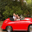

automobile	


In [37]:
itorch.image(trainset.data[100]) -- display the 100-th image in dataset
print(classes[trainset.label[100]])

Now, to prepare the dataset to be used with __nn.StochasticGradient__, a couple of things have to be done according to it's [documentation](https://github.com/torch/nn/blob/master/doc/training.md#traindataset).
1. The dataset has to have a :size() function.
2. The dataset has to have a [i] index operator, so that dataset[i] returns the ith sample in the datset.

Both can be done quickly:

In [ ]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

In [ ]:
print(trainset:size()) -- just to test

In [ ]:
print(trainset[33]) -- load sample number 33.
itorch.image(trainset[33][1])

__One of the most important things you can do in conditioning your data (in general in data-science or machine learning) is to make your data to have a mean of 0.0 and standard-deviation of 1.0.__

Let us do that as a final step of our data processing.

To do this, we introduce you to the tensor indexing operator.
It is shown by example:

In [ ]:
redChannel = trainset.data[{ {}, {1}, {}, {}  }] -- this picks {all images, 1st channel, all vertical pixels, all horizontal pixels}

In [ ]:
print(#redChannel)

In this indexing operator, you initally start with ___[{ }]___. You can pick all elements in a dimension using ___{}___ or pick a particular element using ___{i}___ where ___i___ is the element index. You can also pick a range of elements using ___{i1, i2}___, for example ___{3,5}___ gives us the 3,4,5 elements.

__Exercise: Select the 150th to 300th data elements of the data__

In [ ]:
-- TODO: fill

Moving back to mean-subtraction and standard-deviation based scaling, doing this operation is simple, using the indexing operator that we learnt above:

In [ ]:
mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

As you notice, our training data is now normalized and ready to be used.

__ 2. Time to define our neural network__


**Exercise:** Copy the neural network from the __Neural Networks__ section above and modify it to take 3-channel images (instead of 1-channel images as it was defined).  
Hint: You only have to change the first layer, change the number 1 to be 3.

__Solution:__

In [ ]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

__3. Let us define the Loss function__

Let us use a Log-likelihood classification loss. It is well suited for most classification problems.

In [ ]:
criterion = nn.ClassNLLCriterion()

__4. Train the neural network__

This is when things start to get interesting.  
Let us first define an __nn.StochasticGradient__ object. Then we will give our dataset to this object's ___:train___ function, and that will get the ball rolling.

In [ ]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [ ]:
trainer:train(trainset)

__5. Test the network, print accuracy__

We have trained the network for 2 passes over the training dataset.  
But we need to check if the network has learnt anything at all.  
We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

Now that we are done with that, let us normalize the test data with the mean and standard-deviation from the training data.

In [ ]:
testset.data = testset.data:double()   -- convert from Byte tensor to Double tensor
for i=1,3 do -- over each image channel
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction    
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

In [ ]:
-- for fun, print the mean and standard-deviation of example-100
horse = testset.data[100]
print(horse:mean(), horse:std())

Okay, now let us see what the neural network thinks these examples above are:

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])

In [ ]:
-- the output of the network is Log-Probabilities. To convert them to probabilities, you have to take e^x 
print(predicted:exp())

You can see the network predictions. The network assigned a probability to each classes, given the image.

To make it clearer, let us tag each probability with it's class-name:

In [ ]:
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

Alright, fine. One single example sucked, but how many in total seem to be correct over the test set?

In [ ]:
correct = 0
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        correct = correct + 1
    end
end

In [ ]:
print(correct, 100*correct/10000 .. ' % ')

That looks waaay better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [ ]:
class_performance = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0}
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        class_performance[groundtruth] = class_performance[groundtruth] + 1
    end
end

In [ ]:
for i=1,#classes do
    print(classes[i], 100*class_performance[i]/1000 .. ' %')
end

Okay, so what next? How do we run this neural network on GPUs?

#### cunn: neural networks on GPUs using CUDA

In [ ]:
require 'cunn';

The idea is pretty simple. Take a neural network, and transfer it over to GPU:

In [ ]:
net = net:cuda()

Also, transfer the criterion to GPU:

In [ ]:
criterion = criterion:cuda()

Ok, now the data:

In [ ]:
trainset.data = trainset.data:cuda()

Okay, let's train on GPU :) #sosimple

In [ ]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [ ]:
trainer:train(trainset)

Why dont I notice MASSIVE speedup compared to CPU?
Because your network is realllly small. 

**Exercise:** Try increasing the size of your network (argument 1 and 2 of nn.SpatialConvolution(...), see what kind of speedup you get.

**Goals achieved:**
* Understand torch and the neural networks package at a high-level.
* Train a small neural network on CPU and GPU

### Where do I go next?

* Build crazy graphs of networks: https://github.com/torch/nngraph
* Train on imagenet with multiple GPUs: https://github.com/soumith/imagenet-multiGPU.torch
* Train recurrent networks with LSTM on text: https://github.com/wojzaremba/lstm

* More demos and tutorials: https://github.com/torch/torch7/wiki/Cheatsheet

* Chat with developers of Torch: http://gitter.im/torch/torch7
* Ask for help: http://groups.google.com/forum/#!forum/torch7
